# Task 4 - DBSCAN 

# 4.1 :Use DBSCAN to cluster the data

In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt


In [4]:
df=pd.read_csv("football_data.csv")

In [5]:
#selecting only numeric attributes
df=df.select_dtypes(exclude=['object'])

In [6]:
#data cleaning (taking care of null values)
df = df.fillna(df.mean())

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Age                       18207 non-null  int64  
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Special                   18207 non-null  int64  
 6   International Reputation  18207 non-null  float64
 7   Weak Foot                 18207 non-null  float64
 8   Skill Moves               18207 non-null  float64
 9   Jersey Number             18207 non-null  float64
 10  Crossing                  18207 non-null  float64
 11  Finishing                 18207 non-null  float64
 12  HeadingAccuracy           18207 non-null  float64
 13  ShortPassing              18207 non-null  float64
 14  Volley

Data Preprocessing

Before we start with the clustering we can perform data processing as the number of features is too much we can apply pca to reduce the number of features and then apply the dbscan clustering approach

In [8]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df.values))

Applying PCA on the scaled data

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
data = pca.fit_transform(data_scaled)

In [10]:
from sklearn.cluster import DBSCAN
# train the model using DBSCAN
db = DBSCAN(eps=1, min_samples=5)
# the prediction for dbscan clusters
db_clusters = db.fit_predict(data)

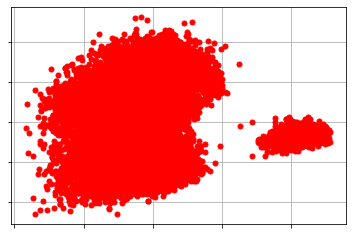

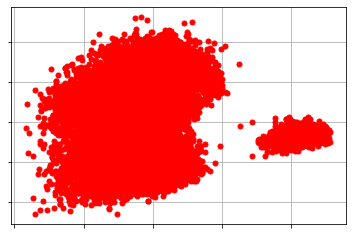

In [15]:
from pyclustering.cluster.dbscan import dbscan
from pyclustering.cluster import cluster_visualizer
dbscan_instance = dbscan(data,2,11)

# Start processing by DBSCAN.
dbscan_instance.process()

# Obtain results of clustering.
clusters = dbscan_instance.get_clusters()
noise = dbscan_instance.get_noise()

# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, data, marker='o')
visualizer.append_cluster(noise, data, marker='x')
visualizer.show()

As we can see we are getting two clusters if we are using pca (Principal Component Analysis ) on the entire data . These are the clusters that we got using pyclustering . Now lets try using sklearn dbscan and use it for further analysis purpose.

In [11]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=4, min_samples=3).fit(data_scaled)
n_clusters_ = len(set(cluster.labels_)) - (1 if -1 in cluster.labels_ else 0)
n_noise_ = list(cluster.labels_).count(-1)
print("Information about the clusters formed :")
print("CLUSTER LABELS :",cluster.labels_)
print("No of clusters:",n_clusters_)
print("Noise",n_noise_)

Information about the clusters formed :
CLUSTER LABELS : [0 0 0 ... 0 0 0]
No of clusters: 1
Noise 0


# 4.2: DBSCAN algorithm requires 2 parameters - epsilon and minPts.So lets decide upon the final eps and minPts.

No of nearest neighbours taken : 2


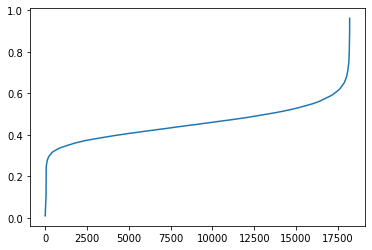

In [16]:
nearest_neigh = NearestNeighbors(n_neighbors=2)
print("No of nearest neighbours taken : 2")
nbrs = nearest_neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)
#plotting the distances
plt.plot(np.sort(distances, axis=0)[:,1])

From this graph we can conclude the optimal value of eps to be 0.6

Now lets focus on the 2nd parameter i.e minPts

In [17]:
print("---------------------------------------------------------------------")
for i in range(1 ,15):
    dbscan_model=DBSCAN(eps=0.6, min_samples=i)
    cluster = dbscan_model.fit(data_scaled)
    #finding unique cluster labels
    len_labels=len(set(cluster.labels_))
    flag=0
    if -1 in cluster.labels_:
        flag=1
    n_clusters_ = len_labels-flag
    print( 'Min No of Samples = ',i,' : Num of Clusters : ',n_clusters_)
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
Min No of Samples =  1  : Num of Clusters :  947
Min No of Samples =  2  : Num of Clusters :  34
Min No of Samples =  3  : Num of Clusters :  5
Min No of Samples =  4  : Num of Clusters :  4
Min No of Samples =  5  : Num of Clusters :  4
Min No of Samples =  6  : Num of Clusters :  4
Min No of Samples =  7  : Num of Clusters :  2
Min No of Samples =  8  : Num of Clusters :  2
Min No of Samples =  9  : Num of Clusters :  2
Min No of Samples =  10  : Num of Clusters :  2
Min No of Samples =  11  : Num of Clusters :  3
Min No of Samples =  12  : Num of Clusters :  2
Min No of Samples =  13  : Num of Clusters :  3
Min No of Samples =  14  : Num of Clusters :  2


As we are aiming for 2 clusters  the minimum No of samples i.e the MinPts for this are 7. So we will be going with 11 points

# 4.3 Analyze the Clusters Formed

Before we begin with the analysis of this clusters as now we know the optimal values for both eps and minPts i.e 0.6 and 11 respectively , let us feed this data to our dbscan algo and see the results formed

In [19]:
dbscan_model=DBSCAN(eps=0.6, min_samples=11)
cluster = dbscan_model.fit(data_scaled)

In [20]:

labels = dbscan_model.labels_

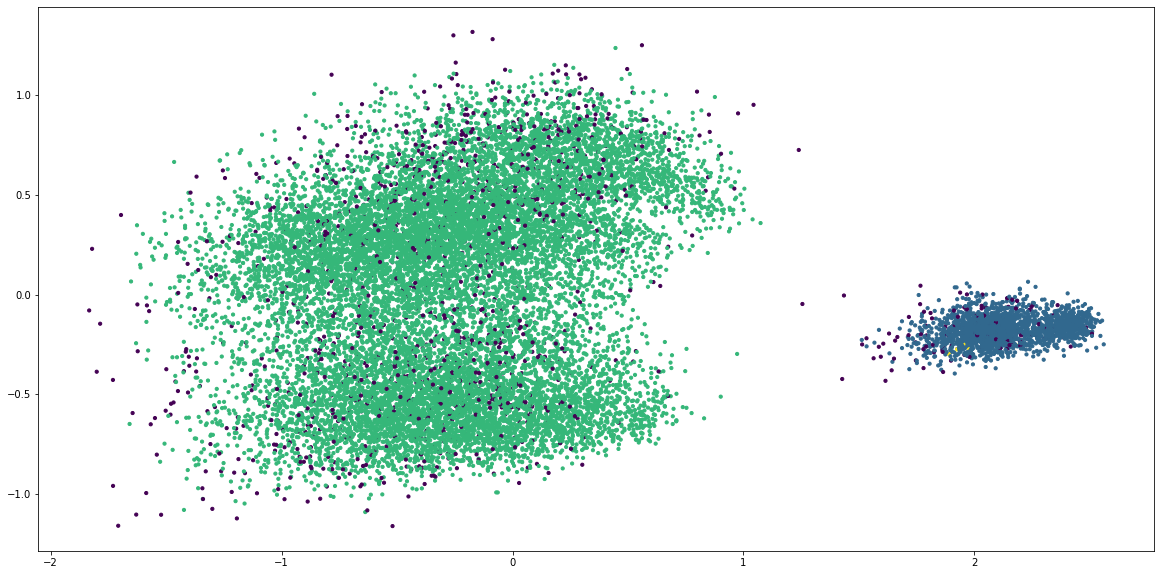

In [22]:
plt.figure(figsize=(20,10))
X=data
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)